# Notebook 4: ***Graphical Models***

Probabilistic Machine Learning -- Spring 2023, UniTS

<a target="_blank" href="https://colab.research.google.com/github/emaballarin/probml-units/blob/main/notebooks/04_graphical_models.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

***Graphical models*** are *graphical* (indeed!) representations of the structure of conditional (in)depencies among random variables. By bridging *probability theory* and *graph theory*, they provide a compact way to visualize the architecture of a model, to motivate the design of new models, and to structure complex probability calculations for performing efficient inference. 

We usually distinguish between two types of graphical models:
- **Bayesian Networks**: ideal for modelling *conditional dependencies* between variables; represented by *directed graphs*;
- **Markov Random Fields**: suitable for modelling *correlations*. In this case the underlying graph is *undirected*.

### Bayesian Networks

Bayesian networks are *Directed Acyclic Graphs* (*DAG*s) whose **nodes** represent **variables** (in a Bayesian sense) and whose **edges** represent **conditional dependency** between variables.

The **joint** distribution defined by such graph is the product, over all the nodes of the graph, of the conditional distributions over the **parent nodes**

$$p(x)=\prod_{k=1}^K p(x_k|\text{parent}_{x_k})$$

Two nodes $A$ and $B$ in such graph are **conditionally independent**, given a node $C$, if and only if 

$$p(A,B|C)=p(A|C)p(B|C)$$

This condition is denoted by $A\perp \!\!\! \perp B|C$.

#### DAG example

A survey dataset contains information about the use of different means of transportation, with a focus on cars and trains, for different social groups. It includes:

- **Age (`A`)**: recorded as `young` for individuals below 30 years of age, `adult` for individuals between 30 and 60 years, and `old` for people older than 60;
- **Sex (`S`)**: biological sex of individual, recorded as male (`M`) or female (`F`);
- **Education (`E`)**: highest level of education or training completed by the individual, recorded as either high school (`high`) or university degree (`uni`);
- **Occupation (`O`)**: recorded as an employee (`emp`) or a self-employed (`self`);
- **Residence (`R`)**: size of the city the individual lives in, recorded as `small` or `big`;
- **Travel (`T`)**: means of transport favoured by the individual, recorded as `car`, `train` or `other`.

`travel` is the *target* of the survey, *i.e.* the quantity of interest whose behaviour is under investigation.

We can represent the relationships between the variables in the dataset by a *DAG*, which describes a factorization of the *joint probability distribution*: 

$$P(A,S,E,O,R,T)=P(A)P(S)P(E|A,S)P(O|E)P(R|E)P(T|O,R)$$

<div> <img src="https://bookdown.org/robertness/causalml/docs/fig/02_layouts-1.png" width="400" /></div>
<sub><sup>From <a href="https://bookdown.org/robertness/causalml/docs/tutorial-probabilistic-modeling-with-bayesian-networks-and-bnlearn.html#plotting-the-dag">Robert O. Ness, Lecture Notes for Causality in Machine Learning, 2019</a></sup></sub>

It is easy to notice that $R\perp \!\!\! \perp O|E$ (*tail to tail* configuration) whereas $R \not\!\perp \!\!\!\perp O|T$ (*head to head*).

In fact, $P(R,O,E)=P(R|E)P(O|E)P(E) {~} \implies {~} P(R,O|E)=P(R|E)P(O|E)$

On the other hand, $P(R,O,T)=P(R)P(O)P(T|R,O)$ and in general $P(T|R,O)\neq P(T)$  
$\implies {~} P(R,O|T)\neq P(R)P(O)$

### Bayesian Network of a *Gaussian Mixture*

It may happen that the data that we are trying to model present a complex structure, where multiple regions of the *variates space* have a high probability mass (*i.e.* data have a multimodal distribution).

A ***mixture model*** is a particular *hierarchical model* made up by several *components*, each with a simple parametric form. Such models assume that data are clustered, and each datapoint is drawn from a distribution representing the belonging cluster. In a Bayesian setting, mixture weights and component parameters are random variables, and the posterior is a conditional distribution over different *clusterings* and *parameters*. 

In the case of **Gaussian mixtures**, the underlying components are modeled with Gaussians priors:

$$
p(x) = \sum_{k=1}^K \pi_k \mathcal{N}(\mu_k,\sigma_k^2)
$$

where $0 \leq \pi_k\leq 1$ and $\sum_{k=1}^K \pi_k = 1$.  

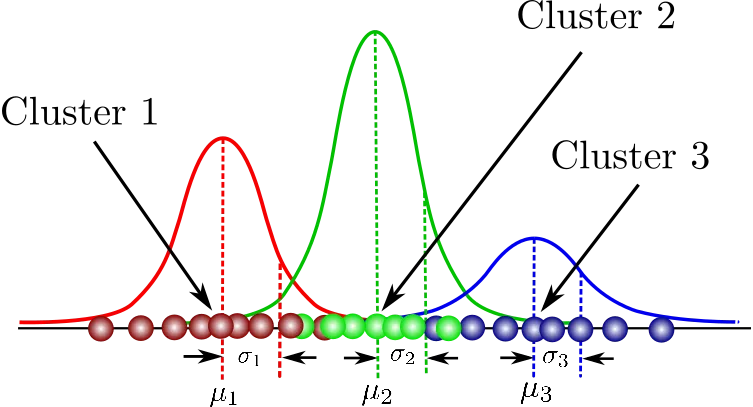
<br><sub><sup>From <a href="https://bookdown.org/robertness/causalml/docs/tutorial-probabilistic-modeling-with-bayesian-networks-and-bnlearn.html#plotting-the-dag">Oscar Contreras Carrasco, Gaussian Mixture Models Explained</a></sup></sub>

In the following, we will consider a *GMM* from [D.M. Blei, *Build, Compute, Critique, Repeat: Data Analysis with Latent Variable Models*, 2014](https://www.cs.columbia.edu/~blei/papers/Blei2014b.pdf). The aim is to show that *PGM*s are a powerful way to describe the structure with which hidden variables of a model interact with observations.

The generative model is the following:
- $\theta \sim Dirichlet_K(\alpha)$ is a probability vector of size $K$
- $\mu_k \sim \mathcal{N}(0,\sigma_{0}^2)
$ are sampled from the mixture components

- For each data point $i$:
    - $z_i | \theta \sim Categorical(\theta)$ is an index in $\{1,\ldots,K\}$
    - $x_i|z_i,\mu_{z_i} \sim \mathcal{N}(\mu_{z_i},1)$ is the i-th observation

where $\theta, \mu_k, z_i$ are the **hidden variables**, $x_i$ the **observables** and $\alpha, \sigma_0$ the fixed **hyperparameters**.  
The rightmost figure shows an alternative representation of the same graphical model, using the *plate notation* on random vectors, which groups repeated variables.

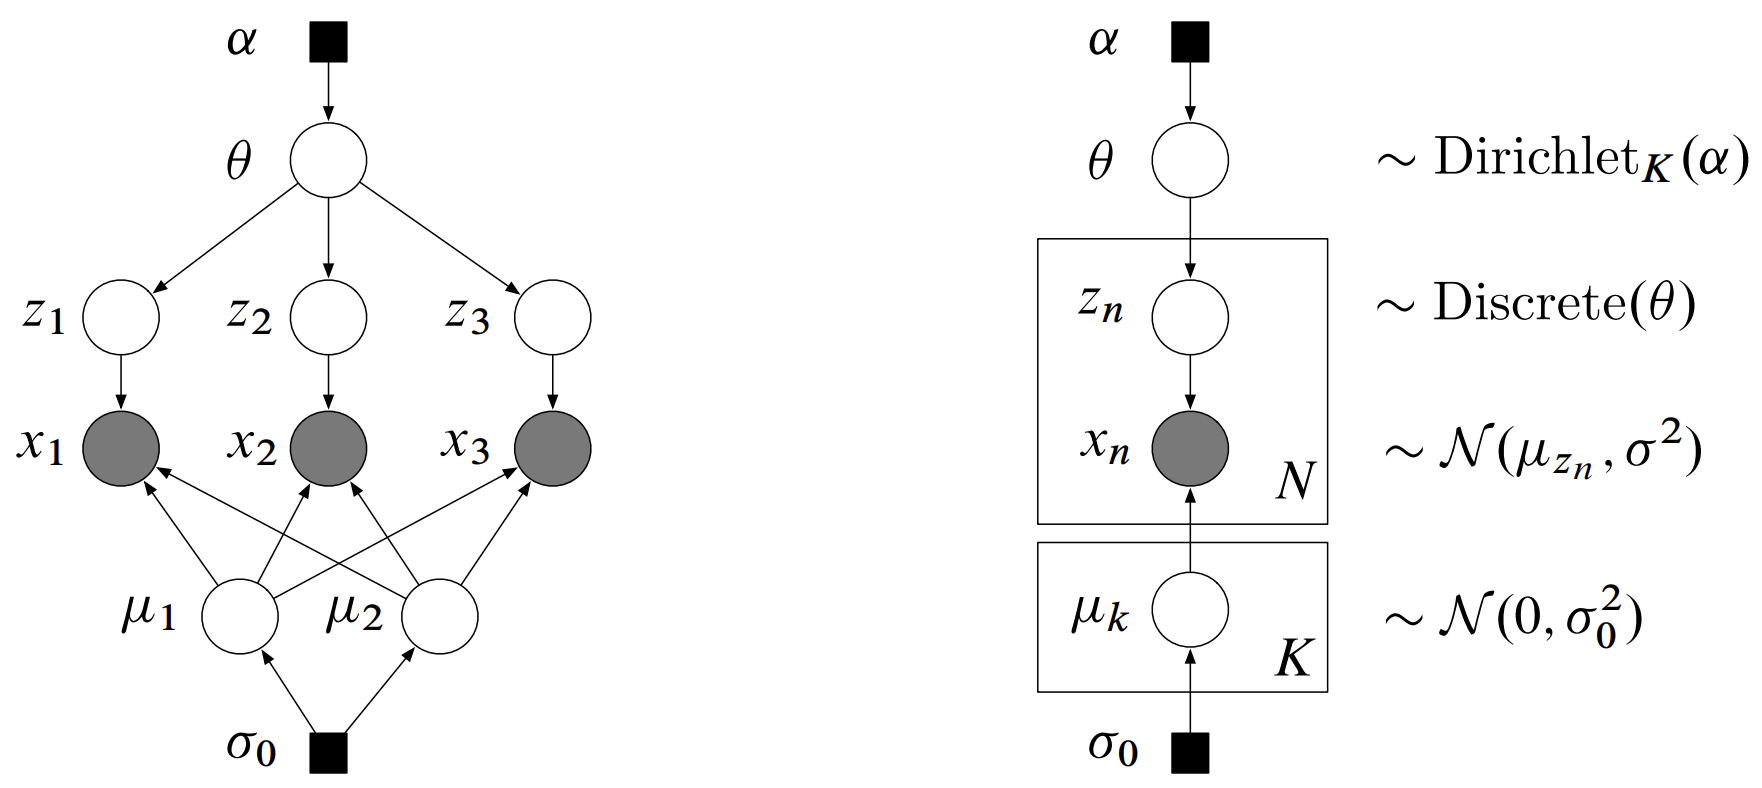
<br><sub><sup>From <a href="https://www.cs.columbia.edu/~blei/papers/Blei2014b.pdf">D.M. Blei, Build, Compute, Critique, Repeat: Data Analysis with Latent Variable Models, 2014</a></sup></sub>

The joint distribution factorizes as:
$$p(\theta,\mu,z,x|\sigma_0,\alpha) = p(\theta|\alpha)\prod_{k=1}^K p(\mu_k|\sigma_0)\prod_{i=1}^N[p(z_i|\theta)p(x_i|z_i,\mu_k)].$$

From this representation the identification of *global* and *local* variables comes easy:
the first ones describe the hidden structure (which is shared for the entire dataset) and the latter ones only regard the distribution of single observations.

The posterior distribution, given the observations, is

$$p(\theta,\mu,z|x,\sigma_0,\alpha)=\frac{p(\theta,\mu,z,x|\sigma_0,\alpha)}{p(x|\sigma_0,\alpha)}.$$


**Pyro implementation**

In [10]:
# If you run this notebook in Colab, do not forget to (uncomment and) run:
# !pip install pyro-ppl

In [11]:
# The usual suspects
import torch as th
import pyro
import pyro.distributions as dist

In [12]:
# number of components
K: int = 3

# hyperparameters
alpha: float = 0.5
sigma_0: float = 10.0


def model(data):
    N: int = len(data)

    # "Global" variables
    theta = pyro.sample("theta", dist.Dirichlet(alpha * th.ones(K)))

    with pyro.plate("components", K):
        mu = pyro.sample("mu", dist.Normal(0.0, sigma_0))

    with pyro.plate("data", N):
        # "Local" variables
        z = pyro.sample("z", dist.Categorical(probs=theta))
        x = pyro.sample("x", dist.Normal(mu[z], 1), obs=data)

    print(f"theta = {theta}\nmu = {mu}\nz = {z}\nx = {x}")


model(data=[7, 0.8, 0.1, 6, 0.5, 6.8])

theta = tensor([0.1366, 0.7918, 0.0716])
mu = tensor([12.3750,  6.6504,  0.6776])
z = tensor([2, 1, 1, 2, 1, 2])
x = [7, 0.8, 0.1, 6, 0.5, 6.8]


The `pyro.plate()` method guarantees that all computations within a `plate` are **conditionally independent**

```python
with pyro.plate("tensor name", tensor size):
    # ... do conditionally independent stuff ...
```

### Markov Random Fields

Markov random fields are **undirected** graphical models, whose **nodes** correspond to **variables** and whose **edges** represent **conditional dependences** between variables.

Any two nodes that are **not** connected by a **direct** edge (not adjacent) are **conditionally independent**, given all the other nodes in the graph.

The factorization rule for those undirected graphs is based on the notion of **cliques**:  complete subgraphs of the original graph; *i.e.* all pairs of nodes are connected by a unique edge. Maximal cliques are cliques that cannot be further extended without them stopping being cliques.

The joint distribution factorizes as the product of *potential functions*

$$\psi_C(x_C)=\exp^{-E(x_C)},$$

over the maximal cliques of the graph

$$p(x)=\frac{1}{Z}\prod_C \psi_C(x_C),$$

where potentials are defined in terms of an *energy* function $E$ and the normalization constant for the joint distirbution is

$$Z=\sum_x\prod_C\psi_C(x_C)$$


#### Ising model for (binary) image denoising

*MRF* applications in computer vision include *image segmentation*, *image completion* and *image denoising*. In all such cases they are used to impose smoothness constraints on the neighboring pixels.

The **Ising model** assumes a grid of nodes, each possibly being in one of two states. In the case of binary images, you can think of each node as being a pixel with a black or white colour.
The state of each node depends on the neighboring nodes through interaction potentials, which impose the smoothness constraint over pixels.

Assume that we have a 2D grid of binary noisy pixel observations of an underlying true image, and we would like to recover the original image. Suppose that $x_i$ is a binary variable denoting the state of pixel $i$ in the (unknown) original image, while $y_i$ represents the corresponding state in the observed noisy image. 

We shall suppose that both $x_i,y_i\in\{-1,+1\}$, and that the noisy image was obtained by randomly flipping the sign of pixels with some small probability, say $10\%$. 

Since the added noise is small, we expect to find a strong correlation between $x_i$ and $y_i$, and between neighbouring pixels $x_i,x_j$. We have two possible cliques, on which we can define the following potential functions:
-  $-\eta x_i y_i$, where $\eta>0$, for $\{x_i,y_i\}$ cliques
-  $-\beta x_i x_j$, where $\beta>0$, for $\{x_i,x_j\}$ cliques

Consequently, the **energy** function for the Ising model becomes 

$$E(x,y)=-\beta\sum_{i,j}x_i x_j-\eta \sum_{i}x_i y_i$$

and the associated joint distribution is 

$$p(x,y)=\frac{1}{Z}\exp^{-E(x,y)}$$

For the purposes of image denoising, we wish to find an image
having a high (joint) probability. We shall use a simple iterative technique called **Iterated conditional modes** (ICM) and defined as follows:


- initialize the variables $x_i=y_i$
- for each node $j$:
    - evaluate the energy function on $x_j$ for the two possible states, while keeping the other node variables fixed,
    - set $x_j$ to the lower energy (higher probability) state.

We repeat the ICM steps for a fixed number of iterations.

A minimal implementation is provided below:

In [13]:
# Imports
import random

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from matplotlib import cm

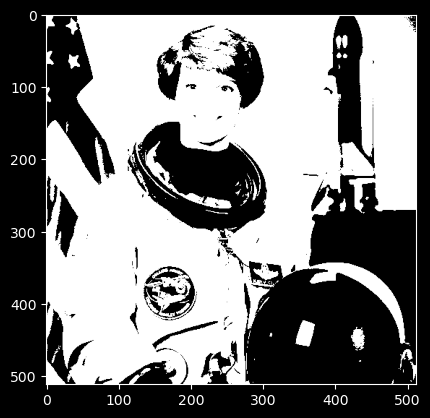

In [14]:
image = mpimg.imread("data/astronaut.png")[:, :, 0]
image = np.where(image > 0.5, -1, 1)
_ = plt.imshow(image, cmap=cm.Greys)

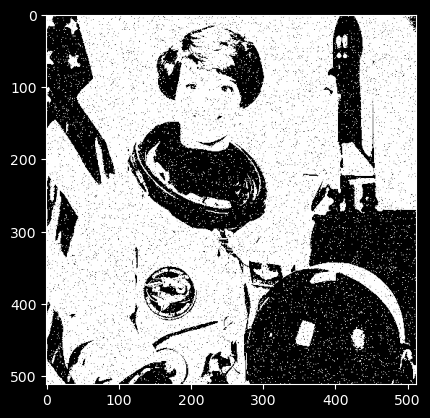

In [15]:
noise = np.zeros((image.shape))

with pyro.plate("pixels", 512**2):
    noise = pyro.sample("mu", dist.Normal(1.0, 0.5)).reshape(512, 512)

noisy = np.where(noise < 0.1, -1, 1)
noisy_image = image * noisy
_ = plt.imshow(noisy_image, cmap=cm.Greys)

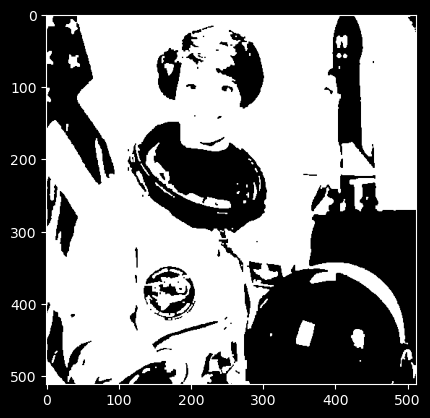

In [16]:
beta = 1.2
eta = 1.8

for iteration in range(4):
    # pixel idxs
    for r in range(0, 511):
        for c in range(0, 511):
            # potentials
            beta_factor = 0  # cliques between neighbors
            eta_factor = 0  # cliques between latent and observed values

            # positive state energy
            x_i = 1
            y_i = noisy_image[r][c]

            if r - 1 >= 0:
                beta_factor += noisy_image[r - 1][c] * x_i
            if r + 1 < 512:
                beta_factor += noisy_image[r + 1][c] * x_i
            if c - 1 >= 0:
                beta_factor += noisy_image[r][c - 1] * x_i
            if c + 1 < 512:
                beta_factor += noisy_image[r][c + 1] * x_i

            eta_factor = x_i * y_i
            pos_state_energy = -beta * beta_factor - eta * eta_factor

            # negative state energy
            beta_factor = 0
            eta_factor = 0
            x_i = -1

            if r - 1 >= 0:
                beta_factor += noisy_image[r - 1][c] * x_i
            if r < 512:
                beta_factor += noisy_image[r + 1][c] * x_i
            if c - 1 >= 0:
                beta_factor += noisy_image[r][c - 1] * x_i
            if c < 512:
                beta_factor += noisy_image[r][c + 1] * x_i

            eta_factor = x_i * y_i
            neg_state_energy = -beta * beta_factor - eta * eta_factor

            # choose lower energy state
            image[r][c] = 1 if pos_state_energy < neg_state_energy else -1

    noisy_image = image

imgplot = plt.imshow(image, cmap=cm.Greys)
plt.show()